In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os, sys
from PIL import Image
import xml.etree.ElementTree as ET

In [24]:
# Where are we going to work?
data_path = "../data/prelim/preprocess2/out/"

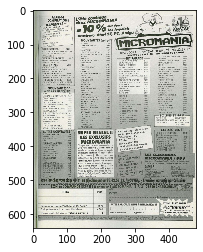

In [74]:
# Let's take an example
im_name = "in-001"
im_path = os.path.join(data_path, im_name + '.jpg')
im = np.array(Image.open(im_path))
plt.imshow(im)
plt.show()

In [75]:
# Corresponding XML file
xml_path = os.path.join(data_path, im_name + '.xml')
tree = ET.parse(xml_path)
root = tree.getroot()

In [76]:
print(root.tag, root.attrib)
for child in root:
    print("- {}".format(child.tag))

annotation {'verified': 'yes'}
- folder
- filename
- path
- source
- size
- segmented
- object
- object
- object
- object
- object
- object


What seems to interest us is the `filename`, and all the `object`s. We may want to use the `verified` value as well. For now, let's focus on the `object`s.

In [77]:
# Explore an object
example = root.find('object')
print(example.tag, example.attrib)
for child in example:
    print("- {}".format(child.tag))

object {}
- name
- pose
- truncated
- difficult
- bndbox


We can notice additionnal objects. The `name` will be our `object`'s class, and we will exploit the values inside `bndbox`.

In [78]:
# See `bndbox`
bndbox = example.find('bndbox')
print(bndbox.tag, bndbox.attrib)
for child in bndbox:
    print("- {}".format(child.tag))

bndbox {}
- xmin
- ymin
- xmax
- ymax


We have everything we want. Now let's create exploitable values for our scripts.

In [88]:
# Columns
columns = ['file_name', 'class_name', 'xmin', 'ymin', 'xmax', 'ymax']

# Data
data = []
for obj in root.findall('object'):
    temp = [root.find('filename').text, obj.find('name').text]
    for child in obj.find('bndbox'):
        temp.append(child.text)
    data.append(temp)
    
# Create a new pandas dataframe
df = pd.DataFrame(data, columns=columns)
df

,file_name,class_name,xmin,ymin,xmax,ymax
0,in-001.jpg,pub_pleine_page,1,1,478,640
1,in-001.jpg,revendeur,1,1,476,638
2,in-001.jpg,pub_texte,1,2,477,640
3,in-001.jpg,bon_commande,3,511,473,620
4,in-001.jpg,publicité,2,1,475,640
5,in-001.jpg,logo,242,18,463,123


Now let's observe the boxes.

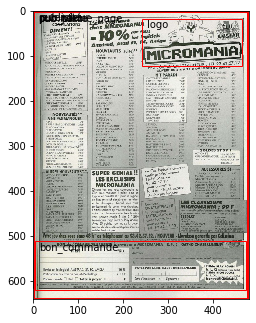

In [96]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread(im_path)
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.file_name == im_name + '.jpg'].iterrows():
    xmin = int(row.xmin)
    xmax = int(row.xmax)
    ymin = int(row.ymin)
    ymax = int(row.ymax)
    
    width = xmax - xmin
    height = ymax - ymin
    
    edgecolor = 'r'
    ax.annotate(row.class_name, xy=(xmin + 10, ymin + 20))
    
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

Testing with another image.

In [98]:
im_name = "in-007"
im_path = os.path.join(data_path, im_name + '.jpg')

xml_path = os.path.join(data_path, im_name + '.xml')
tree = ET.parse(xml_path)
root = tree.getroot()

In [99]:
# Columns
columns = ['file_name', 'class_name', 'xmin', 'ymin', 'xmax', 'ymax']

# Data
data = []
for obj in root.findall('object'):
    temp = [root.find('filename').text, obj.find('name').text]
    for child in obj.find('bndbox'):
        temp.append(child.text)
    data.append(temp)
    
# Create a new pandas dataframe
df = pd.DataFrame(data, columns=columns)
df.head()

,file_name,class_name,xmin,ymin,xmax,ymax
0,in-007.jpg,publicité,1,1,477,640
1,in-007.jpg,pub_pleine_page,3,1,476,640
2,in-007.jpg,logo,334,44,441,258
3,in-007.jpg,jeu,1,1,476,640


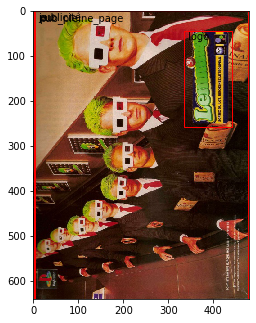

In [100]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread(im_path)
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.file_name == im_name + '.jpg'].iterrows():
    xmin = int(row.xmin)
    xmax = int(row.xmax)
    ymin = int(row.ymin)
    ymax = int(row.ymax)
    
    width = xmax - xmin
    height = ymax - ymin
    
    edgecolor = 'r'
    ax.annotate(row.class_name, xy=(xmin + 10, ymin + 20))
    
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)